**Classificação Supervisionada usando Máquina de Vetor de Suporte**

Vamos prever através do modelo de classificação supervisionado, o status de empréstimo para cada pessoa, baseado em algumas características listadas no dataset

In [1]:
# importando bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
loan_dataset = pd.read_csv('train.csv')

In [3]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# tamanho do dataset
loan_dataset.shape

(614, 13)

In [5]:
# esttística do dataset
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# vamos procurar por valores faltantes
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# dropar todos os valores faltantes
loan_dataset = loan_dataset.dropna()

In [8]:
# checando se existem ainda valores faltantes
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
# checando o novo tamanho do nosso dataset
loan_dataset.shape

(480, 13)

In [10]:
# checando os valores presentes em algumas colunas
# vamos checar na coluna dependentes
loan_dataset['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [11]:
# vamos substituir 3+ por um valor, no caso o 4
loan_dataset = loan_dataset.replace({'Dependents': {'3+':4}})

In [12]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [13]:
# vamos substituir os valores alvos, transformado valores nominais para numéricos
loan_dataset.replace({'Loan_Status':{'N':0,'Y':1}}, inplace=True)

In [14]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


<Axes: xlabel='Education', ylabel='Count'>

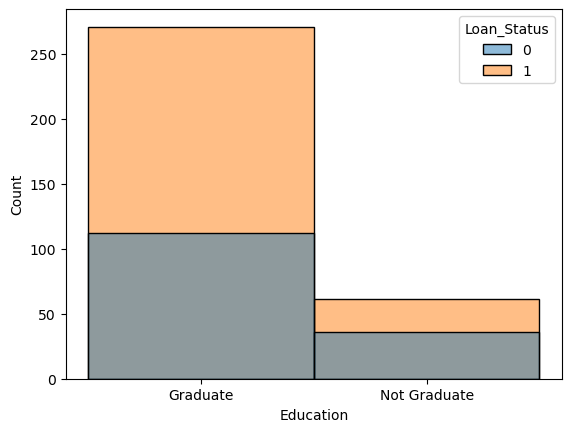

In [15]:
# vamos fazer um gráfico com o número de pessoas com loan_status positivo e negativos separados por graduados 
# e não graduados
sns.histplot(x='Education', hue='Loan_Status', data=loan_dataset)

<Axes: xlabel='Married', ylabel='Count'>

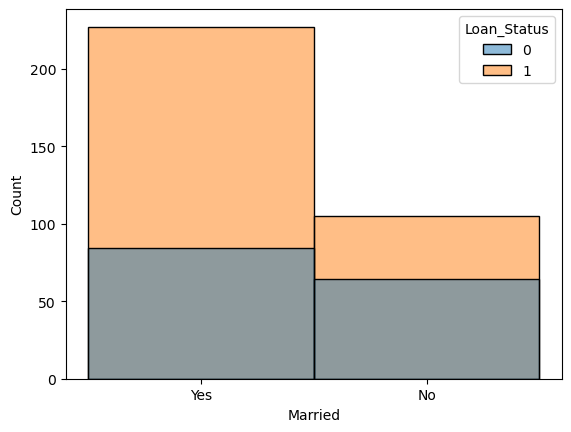

In [16]:
# faremos o mesmo gráfico, agora separando os loan_status por casados e não casados
sns.histplot(x='Married', hue='Loan_Status', data=loan_dataset)

In [17]:
# agora vamos converted os dados nominais faltantes para numéricos
loan_dataset.replace({'Married':{'No':0,'Yes':1}, 
                      'Gender':{'Male':1,'Female':0},
                      'Self_Employed':{'No':0,'Yes':1},
                     'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}, 
                      'Education': {'Graduate':1, 'Not Graduate':0}}, inplace=True)

In [18]:
# nosso novo dataset ficou assim:
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [19]:
# vamos separar o dataset em dois, os preditores e o alvo e dropar a coluna Loan_ID, que não é interessante 
# manter no modelo de ML, pois não influencia em nada no resultado, por ser apenas um identificador
X = loan_dataset.drop(columns=['Loan_ID', 'Loan_Status'], axis=1)
Y = loan_dataset['Loan_Status']

In [20]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [21]:
# vamos separar os datasets em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=2, test_size=0.1, stratify=Y)

In [22]:
# checando o tamanho dos datasets, agora separados
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


In [23]:
# nomeando o classificador
classifier = svm.SVC(kernel='linear')
classifier

SVC(kernel='linear')

In [ ]:
# treinando nossos dados com o modelo 
classifier.fit(X_train, Y_train)

In [ ]:
# vamos prever os valores de loan_status e ao compará-los com os valores reais, teremos um valor de acurácia 
# do nosso modelo
# faremos isto inicialmente para os dados de treino

X_train_prediction = classifier.predict(X_train)
trainning_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy on trainning data: ', trainning_data_accuracy )


In [ ]:
# repetiremos o processo para os dados de teste, lembrando que a acurácia deve se manter próxima, 
# indicando não ter problemas de "overfitting"

X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy on test data: ', test_data_accuracy )

In [31]:
# testando agora com os dados aleatórios, para verificar se nosso modelo, realizará a previsão correta, 
# lembrando que poderiamdos colocar qualquer valor nos atributos e fazer uma nova previsão, respeitando os valores
# que são binários

input_data = (1,0,0,0,1,5849,0,128,360,0,0)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==1):
    print('Loan Status Approved')
else:
    print('Loan Status Denied')


[0]
Loan Status Denied


C:\Users\mau_a\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
